# **TUBES AIML IF22H TINGKAT GEMAR MEMBACA INDONESIA**

# **Preprocessing Data**

In [ ]:
!pip install scikit-learn pandas matplotlib seaborn
# 🔹 Import Library
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from google.colab import files

# 🔹 Unggah File CSV
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

try:
    df = pd.read_csv(file_name)
except pd.errors.ParserError:
    df = pd.read_csv(file_name, sep=';')

# 🔹 Menghapus nilai yang hilang
df_cleaned = df.dropna()

#  fitur yang relevan untuk analisis
features = [
    "Reading Frequency per week",
    "Number of Readings per Quarter",
    "Daily Reading Duration (in minutes)",
    "Internet Access Frequency per Week",
    "Daily Internet Duration (in minutes)",
    "Tingkat Kegemaran Membaca (Reading Interest)"
]

X = df_cleaned[features]


for column in features:
    try:

        X[column] = pd.to_numeric(X[column].str.replace(',', '.'), errors='raise')
    except AttributeError:

        pass
    except ValueError:
        print(f"Error: Column '{column}' contains non-numeric data that can't be converted.")

# 🔹 Encode target variable (untuk klasifikasi)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df_cleaned["Category"])

# 🔹 Normalisasi fitur (untuk memastikan skala yang seimbang)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 🔹 Simpan hasil preprocessing
import numpy as np
np.save("X_scaled.npy", X_scaled)
np.save("y.npy", y)

print(" Preprocessing selesai.")

Saving TGM 2020-2023_eng.csv to TGM 2020-2023_eng (6).csv
 Preprocessing selesai.


<ipython-input-40-a1c3c10cafa7>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = pd.to_numeric(X[column].str.replace(',', '.'), errors='raise')


# **Menangani Missing Value**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

X_scaled = np.load("X_scaled.npy")
y = np.load("y.npy")

# 🔹 Load Dataset dengan Deteksi Delimiter Otomatis
try:
    df = pd.read_csv(file_name, sep=',')
except pd.errors.ParserError:
    try:
        df = pd.read_csv(file_name, sep=';')
    except pd.errors.ParserError:
        df = pd.read_csv(file_name, sep='\t')

# 🔹 Mengecek Nilai yang Hilang
print("\n📌 Cek Missing Values Sebelum Imputasi:\n")
print(df.isnull().sum())

# 🔹 Menangani Missing Values dalam Kolom Akses & Durasi Internet
missing_columns = ["Internet Access Frequency per Week", "Daily Internet Duration (in minutes)"]

# ----> Convert columns to numeric before calculating the mean
for col in missing_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # errors='coerce' replaces invalid values with NaN

# Menggunakan Mean Imputation untuk mengisi nilai yang hilang
df[missing_columns] = df[missing_columns].fillna(df[missing_columns].mean())

# 🔹 Mengecek kembali apakah masih ada missing values setelah imputasi
print("\n✅ Missing values setelah imputasi:\n")
print(df.isnull().sum())

# 🔹 Simpan Dataset yang Sudah Dibersihkan
df.to_csv("cleaned_dataset.csv", index=False)


📌 Cek Missing Values Sebelum Imputasi:

Provinsi                                         0
Year                                             0
Reading Frequency per week                       0
Number of Readings per Quarter                   0
Daily Reading Duration (in minutes)              0
Internet Access Frequency per Week              35
Daily Internet Duration (in minutes)            35
Tingkat Kegemaran Membaca (Reading Interest)     0
Category                                         0
dtype: int64

✅ Missing values setelah imputasi:

Provinsi                                        0
Year                                            0
Reading Frequency per week                      0
Number of Readings per Quarter                  0
Daily Reading Duration (in minutes)             0
Internet Access Frequency per Week              0
Daily Internet Duration (in minutes)            0
Tingkat Kegemaran Membaca (Reading Interest)    0
Category                                        0


# **Klasifikasi dengan Decision Tree & Random Forest**

✅ Data Training: 84 sampel
✅ Data Testing: 21 sampel

✅ Akurasi Decision Tree: 0.6667
📊 Laporan Klasifikasi Decision Tree:
               precision    recall  f1-score   support

           0       0.57      0.50      0.53         8
           1       0.71      0.77      0.74        13

    accuracy                           0.67        21
   macro avg       0.64      0.63      0.64        21
weighted avg       0.66      0.67      0.66        21


✅ Akurasi Random Forest: 0.8095
📊 Laporan Klasifikasi Random Forest:
               precision    recall  f1-score   support

           0       0.75      0.75      0.75         8
           1       0.85      0.85      0.85        13

    accuracy                           0.81        21
   macro avg       0.80      0.80      0.80        21
weighted avg       0.81      0.81      0.81        21



<ipython-input-33-2d195b82cf3a>:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette="coolwarm")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


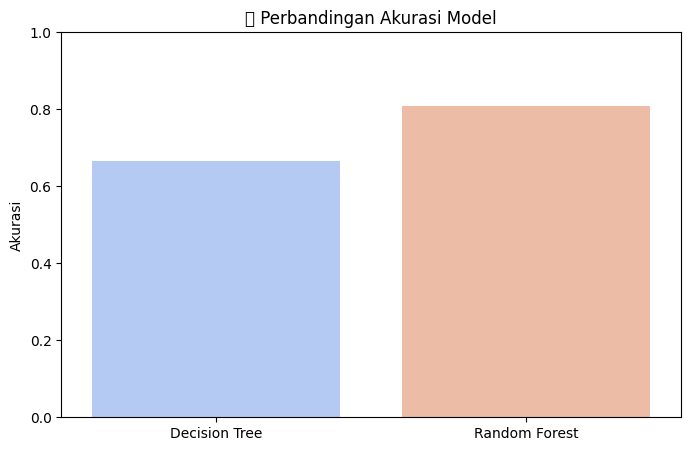

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from google.colab import files

X_scaled = np.load("X_scaled.npy")
y = np.load("y.npy")

# 🔹 Membagi data menjadi 80% training dan 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(f"✅ Data Training: {X_train.shape[0]} sampel")
print(f"✅ Data Testing: {X_test.shape[0]} sampel")

# 🔹 Membuat model Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# 🔹 Membuat model Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 🔹 Memprediksi hasil menggunakan data uji
y_pred_dt = dt_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

# 🔹 Evaluasi Model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

classification_report_dt = classification_report(y_test, y_pred_dt)
classification_report_rf = classification_report(y_test, y_pred_rf)

# 🔹 Menampilkan hasil evaluasi
print(f"\n✅ Akurasi Decision Tree: {accuracy_dt:.4f}")
print("📊 Laporan Klasifikasi Decision Tree:\n", classification_report_dt)

print(f"\n✅ Akurasi Random Forest: {accuracy_rf:.4f}")
print("📊 Laporan Klasifikasi Random Forest:\n", classification_report_rf)


# 🔹 Perbandingan Akurasi dalam Bar Chart
models = ["Decision Tree", "Random Forest"]
accuracies = [accuracy_dt, accuracy_rf]

plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=accuracies, palette="coolwarm")
plt.title("📊 Perbandingan Akurasi Model")
plt.ylabel("Akurasi")
plt.ylim(0, 1)
plt.show()


# **Visualisasi Klasifikasi dengan Decision Tree & Random Forest**

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


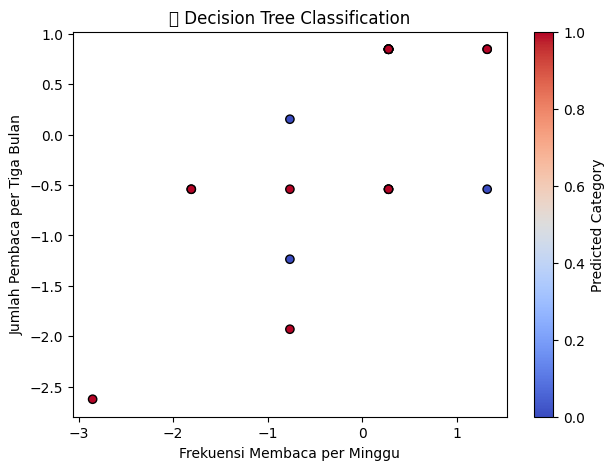

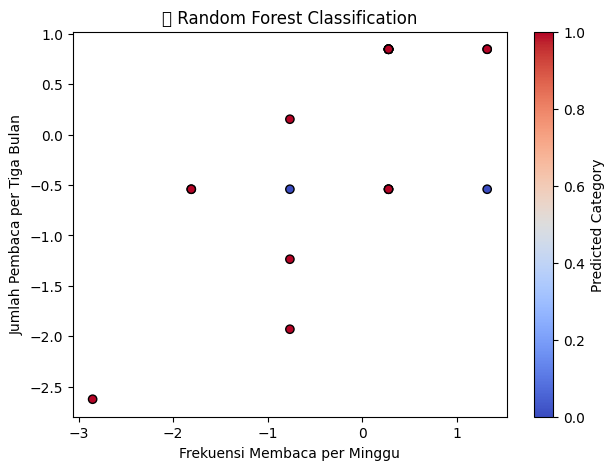

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

X_scaled = np.load("X_scaled.npy")
y = np.load("y.npy")

# 🔹 Membagi data menjadi 80% training dan 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 🔹 Membuat dan Melatih Model Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# 🔹 Membuat dan Melatih Model Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# 🔹 Visualisasi Prediksi Decision Tree
plt.figure(figsize=(7, 5))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_dt, cmap="coolwarm", edgecolor="black")
plt.colorbar(label="Predicted Category")
plt.xlabel("Frekuensi Membaca per Minggu")
plt.ylabel("Jumlah Pembaca per Tiga Bulan")
plt.title("📊 Decision Tree Classification")
plt.show()

# 🔹 Visualisasi Prediksi Random Forest
plt.figure(figsize=(7, 5))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_rf, cmap="coolwarm", edgecolor="black")
plt.colorbar(label="Predicted Category")
plt.xlabel("Frekuensi Membaca per Minggu")
plt.ylabel("Jumlah Pembaca per Tiga Bulan")
plt.title("📊 Random Forest Classification")
plt.show()

# **Elbow Method dan Silhouette Score**

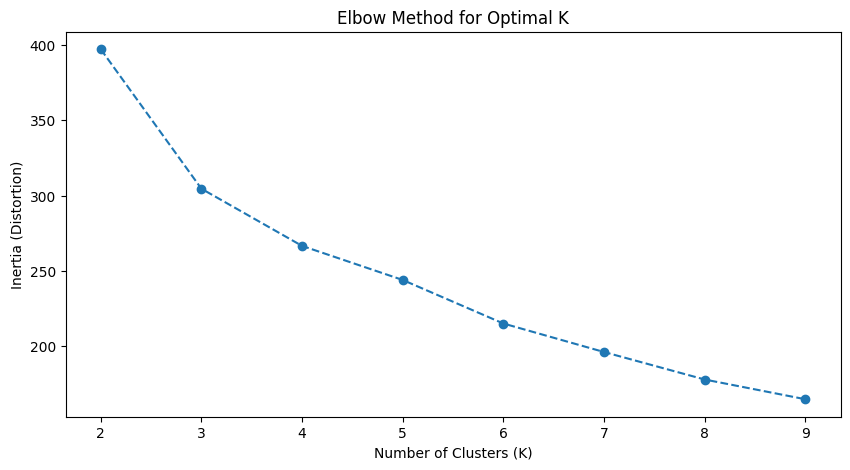

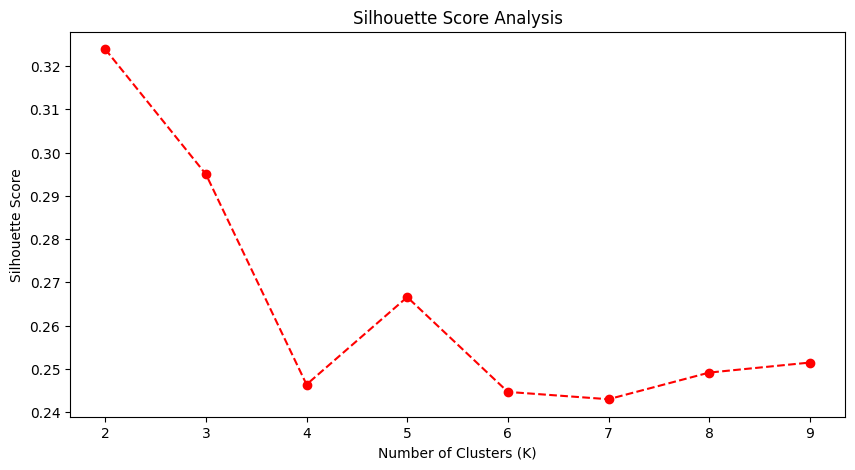

📊 K terbaik berdasarkan Silhouette Score: 2


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load Data yang Sudah Diproses
X_scaled = np.load("X_scaled.npy")

# Mencoba beberapa nilai K
k_values = range(2, 10)  # Coba K dari 2 hingga 10
silhouette_scores = []
inertia_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, labels))
    inertia_values.append(kmeans.inertia_)  # Inertia digunakan di Elbow Method

# Visualisasi Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(k_values, inertia_values, marker='o', linestyle='--')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (Distortion)")
plt.title("Elbow Method for Optimal K")
plt.show()

# Visualisasi Silhouette Score untuk tiap K
plt.figure(figsize=(10, 5))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='--', color='r')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score Analysis")
plt.show()

# Menampilkan K terbaik berdasarkan Silhouette Score
best_k = k_values[np.argmax(silhouette_scores)]
print(f"📊 K terbaik berdasarkan Silhouette Score: {best_k}")


# **CLUSTERING DENGAN K-MEANS DAN DBSCAN**

📊 Silhouette Score K-Means: 0.2950
📊 Silhouette Score DBSCAN: -0.0247


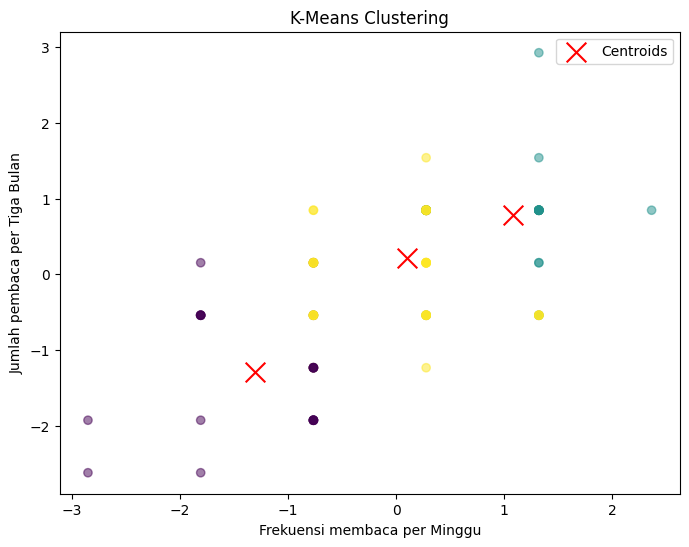

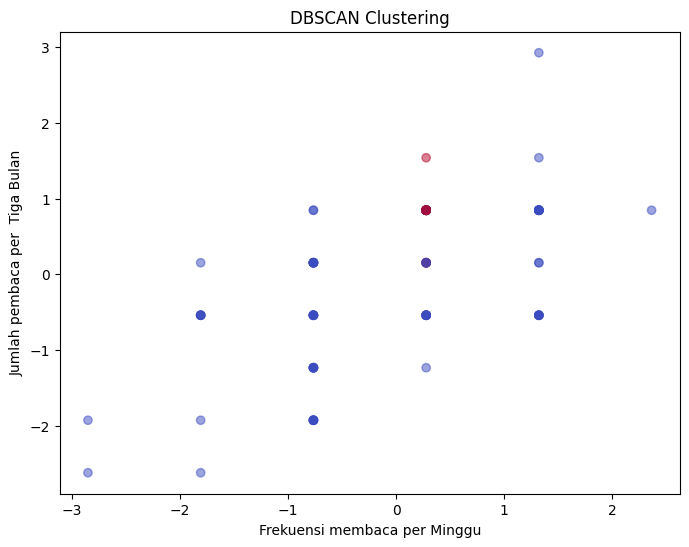

✅ Clustering dengan DBSCAN selesai!


In [ ]:
# 🔹 Import Library
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

# 🔹 Load Data yang Sudah Diproses
X_scaled = np.load("X_scaled.npy")

# 🔹 K-Means Clustering (Menggunakan 3 Cluster)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)

# 🔹 DBSCAN Clustering (Menentukan epsilon & minimal samples)
dbscan = DBSCAN(eps=0.8, min_samples=5)  # Parameter dapat disesuaikan
dbscan_labels = dbscan.fit_predict(X_scaled)

# 🔹 Menghitung Silhouette Score
if len(set(dbscan_labels)) > 1:
    dbscan_silhouette = silhouette_score(X_scaled, dbscan_labels)
else:
    dbscan_silhouette = -1  # Tidak valid jika hanya ada satu cluster

# 🔹 Cetak Hasil
print(f"📊 Silhouette Score K-Means: {kmeans_silhouette:.4f}")
print(f"📊 Silhouette Score DBSCAN: {dbscan_silhouette:.4f}")

# 🔹 Visualisasi Hasil Clustering

# K-Means Visualisasi
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=200, label="Centroids")
plt.title("K-Means Clustering")
plt.xlabel("Frekuensi membaca per Minggu")
plt.ylabel("Jumlah pembaca per Tiga Bulan")
plt.legend()
plt.show()

# DBSCAN Visualisasi
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=dbscan_labels, cmap='coolwarm', alpha=0.5)
plt.title("DBSCAN Clustering")
plt.xlabel("Frekuensi membaca per Minggu")
plt.ylabel("Jumlah pembaca per  Tiga Bulan")
plt.show()

print("✅ Clustering dengan DBSCAN selesai!")


# **Eksplorasi Hubungan Internet Usage & Reading Frequency menggunakan k means dan random forest**

✅ Silhouette Score K-Means: 0.3885


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


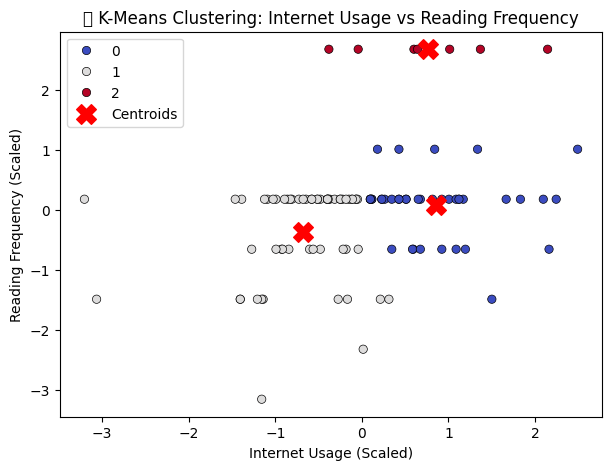


✅ Akurasi Random Forest: 0.8095

📊 Laporan Klasifikasi Random Forest:
               precision    recall  f1-score   support

           0       0.75      0.75      0.75         8
           1       0.85      0.85      0.85        13

    accuracy                           0.81        21
   macro avg       0.80      0.80      0.80        21
weighted avg       0.81      0.81      0.81        21



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


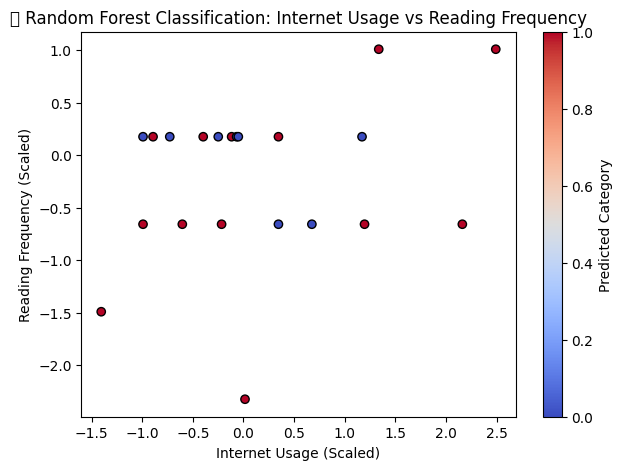

In [ ]:
# 🔹 Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 🔹 Memuat dataset
X_scaled = np.load("/content/X_scaled.npy")
y = np.load("/content/y.npy")

# 🔹 Menentukan fitur yang digunakan (Internet Usage & Reading Frequency)
internet_usage_idx = 2
reading_frequency_idx = 3

df = pd.DataFrame(X_scaled[:, [internet_usage_idx, reading_frequency_idx]], columns=["Internet Usage", "Reading Frequency"])

# 🔹 Clustering dengan K-Means
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(df[["Internet Usage", "Reading Frequency"]])

# 🔹 Menghitung Silhouette Score
silhouette_kmeans = silhouette_score(df[["Internet Usage", "Reading Frequency"]], df["Cluster"])
print(f"✅ Silhouette Score K-Means: {silhouette_kmeans:.4f}")

# 🔹 Visualisasi Hasil Clustering
plt.figure(figsize=(7, 5))
sns.scatterplot(data=df, x="Internet Usage", y="Reading Frequency", hue="Cluster", palette="coolwarm", edgecolor="black")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label="Centroids")
plt.title("📊 K-Means Clustering: Internet Usage vs Reading Frequency")
plt.xlabel("Internet Usage (Scaled)")
plt.ylabel("Reading Frequency (Scaled)")
plt.legend()
plt.show()

# 🔹 Membuat dan melatih model Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# 🔹 Evaluasi Model Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_report_rf = classification_report(y_test, y_pred_rf)

# 🔹 Menampilkan hasil evaluasi
print(f"\n✅ Akurasi Random Forest: {accuracy_rf:.4f}")
print("\n📊 Laporan Klasifikasi Random Forest:\n", classification_report_rf)

# 🔹 Visualisasi Prediksi Random Forest
plt.figure(figsize=(7, 5))
# ----> Using the correct indices to access columns in X_test
plt.scatter(X_test[:, internet_usage_idx], X_test[:, reading_frequency_idx], c=y_pred_rf, cmap="coolwarm", edgecolor="black")
plt.colorbar(label="Predicted Category")
plt.xlabel("Internet Usage (Scaled)")
plt.ylabel("Reading Frequency (Scaled)")
plt.title("📊 Random Forest Classification: Internet Usage vs Reading Frequency")
plt.show()


# **Analisis Provinsi dengan Minat Membaca Tertinggi dan Terendah**

✅ Dataset berhasil dimuat!

📊 5 Provinsi dengan Minat Membaca Tertinggi:
           Provinsi  Reading Frequency per week
34       Yogyakarta                       5.500
28        West Java                       5.375
5      Central Java                       5.250
8         East Java                       5.250
9   East Kalimantan                       5.250

📊 5 Provinsi dengan Minat Membaca Terendah:
            Provinsi  Reading Frequency per week
21             Papua                       3.875
19    North Sulawesi                       4.000
31        West Papua                       4.000
7   Central Sulawesi                       4.125
16            Maluku                       4.125


<ipython-input-46-6416c6ba4b45>:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_5_provinces, x="Provinsi", y="Reading Frequency per week", palette="Blues_d")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


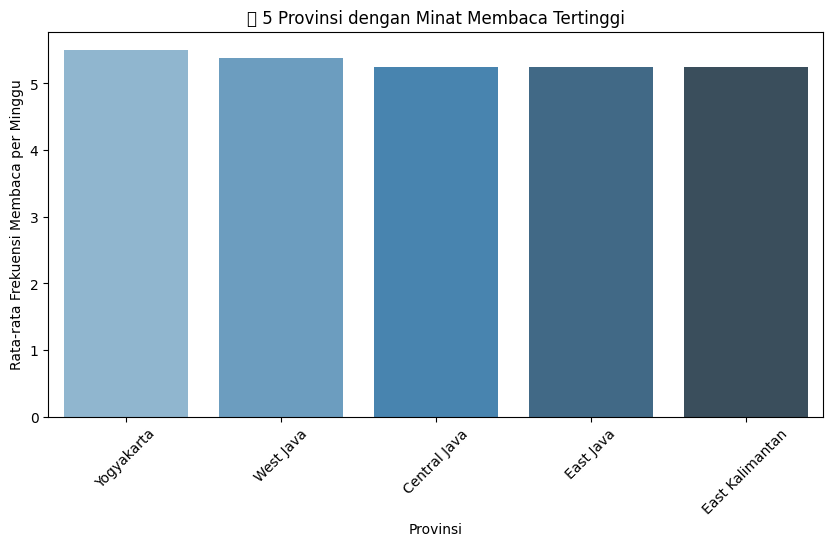

<ipython-input-46-6416c6ba4b45>:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom_5_provinces, x="Provinsi", y="Reading Frequency per week", palette="Reds_d")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


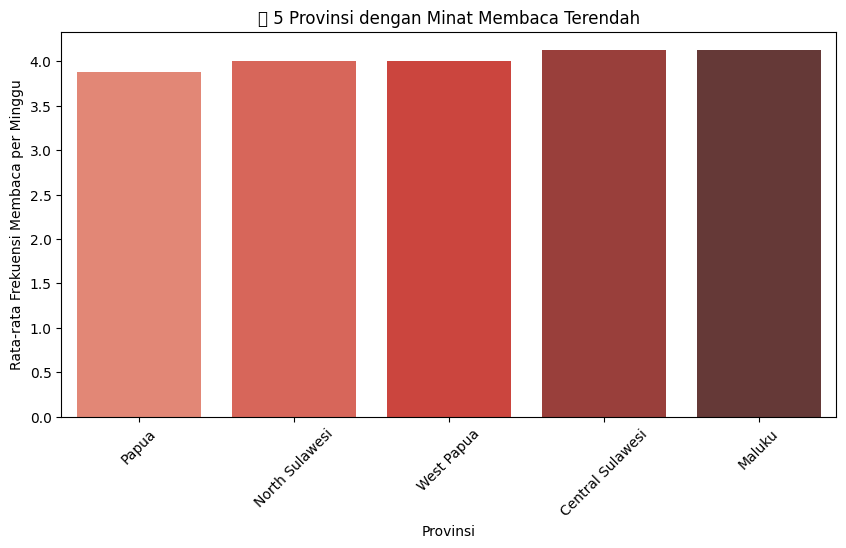

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

file_path = "/content/cleaned_dataset.csv"
df = pd.read_csv(file_path)
try:
    df = pd.read_csv(file_name, sep=',')
except pd.errors.ParserError:
    try:
        df = pd.read_csv(file_name, sep=';')
    except pd.errors.ParserError:
        df = pd.read_csv(file_name, sep='\t')

print("✅ Dataset berhasil dimuat!")

# 🔹 Membersihkan Format Angka
df.replace(',', '.', regex=True, inplace=True)

# 🔹 Mengonversi Kolom Numerik ke Tipe Float
numeric_columns = [
    "Reading Frequency per week",
    "Number of Readings per Quarter",
    "Daily Reading Duration (in minutes)",
    "Internet Access Frequency per Week",
    "Daily Internet Duration (in minutes)",
    "Tingkat Kegemaran Membaca (Reading Interest)"
]

for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# 🔹 Menghitung Rata-rata Frekuensi Membaca per Provinsi
reading_avg = df.groupby(["Provinsi"])["Reading Frequency per week"].mean().reset_index()

# 🔹 Menentukan 5 Provinsi dengan Minat Membaca Tertinggi & Terendah
top_5_provinces = reading_avg.nlargest(5, "Reading Frequency per week")
bottom_5_provinces = reading_avg.nsmallest(5, "Reading Frequency per week")

# 🔹 Menampilkan Hasil
print("\n📊 5 Provinsi dengan Minat Membaca Tertinggi:")
print(top_5_provinces)

print("\n📊 5 Provinsi dengan Minat Membaca Terendah:")
print(bottom_5_provinces)

# 🔹 Visualisasi Provinsi dengan Minat Membaca Tertinggi
plt.figure(figsize=(10, 5))
sns.barplot(data=top_5_provinces, x="Provinsi", y="Reading Frequency per week", palette="Blues_d")
plt.title("📊 5 Provinsi dengan Minat Membaca Tertinggi")
plt.xlabel("Provinsi")
plt.ylabel("Rata-rata Frekuensi Membaca per Minggu")
plt.xticks(rotation=45)
plt.show()

# 🔹 Visualisasi Provinsi dengan Minat Membaca Terendah
plt.figure(figsize=(10, 5))
sns.barplot(data=bottom_5_provinces, x="Provinsi", y="Reading Frequency per week", palette="Reds_d")
plt.title("📊 5 Provinsi dengan Minat Membaca Terendah")
plt.xlabel("Provinsi")
plt.ylabel("Rata-rata Frekuensi Membaca per Minggu")
plt.xticks(rotation=45)
plt.show()

# **minat membaca antara tahun 2020 dan 2023**


📊 Provinsi dengan pembaca terbanyak di tahun 2020:
   Year   Provinsi  Reading Frequency per week
8  2020  East Java                         5.0

📊 Provinsi dengan pembaca terbanyak di tahun 2023:
    Year Provinsi  Reading Frequency per week
38  2023   Banten                         5.5


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


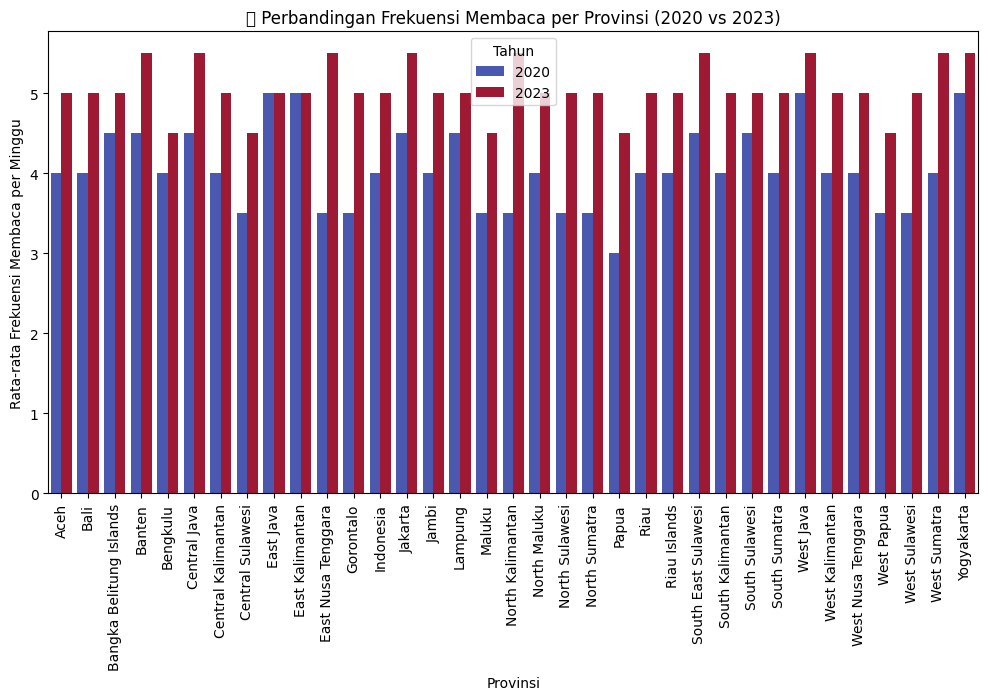

In [ ]:
# 🔹 Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 🔹 Memuat Dataset
file_path = "/content/cleaned_dataset.csv"  # Sesuaikan dengan lokasi dataset
df = pd.read_csv(file_path)

# 🔹 Membersihkan Format Angka
df.replace(',', '.', regex=True, inplace=True)

# 🔹 Mengonversi Kolom Numerik ke Tipe Float
numeric_columns = [
    "Reading Frequency per week",
    "Number of Readings per Quarter",
    "Daily Reading Duration (in minutes)",
    "Internet Access Frequency per Week",
    "Daily Internet Duration (in minutes)",
    "Tingkat Kegemaran Membaca (Reading Interest)"
]

for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# 🔹 Memfilter Data untuk Tahun 2020 dan 2023
df_filtered = df[df["Year"].isin([2020, 2023])]

# 🔹 Menghitung Rata-rata Frekuensi Membaca per Provinsi untuk Tahun 2020 dan 2023
# ----> Changed 'Province' to 'Provinsi'
reading_avg = df_filtered.groupby(["Year", "Provinsi"])["Reading Frequency per week"].mean().reset_index()

# 🔹 Menentukan Provinsi dengan Pembaca Terbanyak di Tahun 2020 dan 2023
# ----> Changed 'Province' to 'Provinsi'
top_province_2020 = reading_avg[reading_avg["Year"] == 2020].nlargest(1, "Reading Frequency per week")
top_province_2023 = reading_avg[reading_avg["Year"] == 2023].nlargest(1, "Reading Frequency per week")

# 🔹 Menampilkan Hasil
print("\n📊 Provinsi dengan pembaca terbanyak di tahun 2020:")
print(top_province_2020)

print("\n📊 Provinsi dengan pembaca terbanyak di tahun 2023:")
print(top_province_2023)

# 🔹 Visualisasi Perbandingan Tahun 2020 vs 2023
plt.figure(figsize=(12, 6))
# ----> Changed 'Province' to 'Provinsi'
sns.barplot(data=reading_avg, x="Provinsi", y="Reading Frequency per week", hue="Year", palette="coolwarm")
plt.xticks(rotation=90)
plt.title("📊 Perbandingan Frekuensi Membaca per Provinsi (2020 vs 2023)")
plt.xlabel("Provinsi")
plt.ylabel("Rata-rata Frekuensi Membaca per Minggu")
plt.legend(title="Tahun")
plt.show()